In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  train_test_split
print('library imported !')

library imported !


In [2]:
df = pd.read_csv('Used_Bikes.csv')
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [3]:
brand = list(df['brand'].value_counts().keys())
print('All are Brand in our dataset !')
brand

All are Brand in our dataset !


['Bajaj',
 'Hero',
 'Royal Enfield',
 'Yamaha',
 'Honda',
 'Suzuki',
 'TVS',
 'KTM',
 'Harley-Davidson',
 'Kawasaki',
 'Hyosung',
 'Benelli',
 'Mahindra',
 'Triumph',
 'Ducati',
 'BMW',
 'Jawa',
 'MV',
 'Indian',
 'Ideal',
 'Rajdoot',
 'LML',
 'Yezdi']

In [4]:
df=df.drop(['bike_name'],axis=1)
df.head(2)

,price,city,kms_driven,owner,age,power,brand
0,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield


In [5]:
df.dtypes

price         float64
city           object
kms_driven    float64
owner          object
age           float64
power         float64
brand          object
dtype: object

In [6]:
df['age'] = df['age'].astype(int)

In [7]:
df.dtypes

price         float64
city           object
kms_driven    float64
owner          object
age             int32
power         float64
brand          object
dtype: object

In [8]:
dic={'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth Owner Or More':4}

df['owner']  =  df['owner'].map(dic)

In [45]:
ser = df['city'].value_counts()
ser[ser>10].keys()
# extracting city name, only those city where >10 bikes are available

Index(['Delhi', 'Bangalore', 'Mumbai', 'Hyderabad', 'Pune', 'Chennai',
       'Lucknow', 'Jaipur', 'Ghaziabad', 'Ahmedabad', 'Noida', 'Bhopal',
       'Gautam Buddha Nagar', 'Kanchipuram', 'Jodhpur', 'Karnal', 'Rupnagar',
       'Allahabad', 'Gurgaon', 'Godhara', 'Faridabad', 'Kadapa', 'Perumbavoor',
       'Ludhiana', 'Kolkata', 'Thane', 'Jhansi', 'Vadodara', 'Surat',
       'Jalandhar', 'Chandigarh', 'Rajkot', 'Indore', 'Dehradun', 'Patna',
       'Navi Mumbai', 'Nagpur', 'Coimbatore', 'Tiruvallur', 'Guwahati',
       'Bhubaneshwar', 'Howrah', 'Kanpur', 'Aurangabad', 'Cuttack',
       'Visakhapatnam', 'Alibag', 'Alipore', 'Kalyan', 'Nashik', 'Ranchi',
       'Udaipur', 'Rohtak', 'Agra', 'Kota', 'Gorakhpur', '24 Pargana',
       'Ernakulam', 'Gandhinagar', 'Meerut'],
      dtype='object', name='city')

In [10]:
city_name=['Delhi', 'Bangalore', 'Mumbai', 'Hyderabad', 'Pune', 'Chennai',
       'Lucknow', 'Jaipur', 'Ghaziabad', 'Ahmedabad', 'Noida', 'Bhopal',
       'Gautam Buddha Nagar', 'Kanchipuram', 'Jodhpur', 'Karnal', 'Allahabad',
       'Rupnagar', 'Gurgaon', 'Godhara', 'Faridabad', 'Perumbavoor', 'Kadapa',
       'Ludhiana', 'Kolkata', 'Thane', 'Jhansi', 'Vadodara', 'Surat',
       'Jalandhar', 'Chandigarh', 'Rajkot', 'Indore', 'Dehradun', 'Patna',
       'Navi Mumbai', 'Nagpur', 'Coimbatore', 'Guwahati', 'Tiruvallur',
       'Bhubaneshwar', 'Howrah', 'Kanpur', 'Aurangabad', 'Cuttack',
       'Visakhapatnam', 'Alibag', 'Alipore', 'Nashik', 'Ranchi', 'Kalyan',
       'Rohtak', 'Udaipur', 'Gorakhpur', 'Agra', 'Kota', '24 Pargana',
       'Meerut', 'Gandhinagar', 'Ernakulam']
df2=df[df['city'].isin(city_name)]
df2.head() 

#Now we are going to filtering the dataset according to our city.

,price,city,kms_driven,owner,age,power,brand
0,35000.0,Ahmedabad,17654.0,1,3,110.0,TVS
1,119900.0,Delhi,11000.0,1,4,350.0,Royal Enfield
2,600000.0,Delhi,110.0,1,8,675.0,Triumph
3,65000.0,Bangalore,16329.0,1,4,180.0,TVS
4,80000.0,Bangalore,10000.0,1,3,150.0,Yamaha


In [11]:
bike_encoding_dict={'Bajaj':3, 'Hero':16, 'Royal Enfield':1, 'Yamaha':5, 'Honda':6, 'Suzuki':7, 'TVS':8,
       'KTM':2, 'Harley-Davidson':4, 'Kawasaki':9, 'Hyosung':10, 'Benelli':11, 'Mahindra':12,
       'Triumph':13, 'Ducati':14, 'BMW':15}
df2['brand'] = df2['brand'].map(bike_encoding_dict)
df2.head()

C:\Users\Ranjit\AppData\Local\Temp\ipykernel_12772\3085031883.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['brand']=df2['brand'].map(bike_encoding_dict)


,price,city,kms_driven,owner,age,power,brand
0,35000.0,Ahmedabad,17654.0,1,3,110.0,8.0
1,119900.0,Delhi,11000.0,1,4,350.0,1.0
2,600000.0,Delhi,110.0,1,8,675.0,13.0
3,65000.0,Bangalore,16329.0,1,4,180.0,8.0
4,80000.0,Bangalore,10000.0,1,3,150.0,5.0


### Handling missing value

In [12]:
df2.isnull().sum()

price          0
city           0
kms_driven     0
owner          0
age            0
power          0
brand         17
dtype: int64

In [13]:
df2 = df2.dropna()

In [14]:
df2.isnull().sum()

price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [15]:
df2['brand'] = df2['brand'].astype(int)

In [16]:
df2.head()

,price,city,kms_driven,owner,age,power,brand
0,35000.0,Ahmedabad,17654.0,1,3,110.0,8
1,119900.0,Delhi,11000.0,1,4,350.0,1
2,600000.0,Delhi,110.0,1,8,675.0,13
3,65000.0,Bangalore,16329.0,1,4,180.0,8
4,80000.0,Bangalore,10000.0,1,3,150.0,5


### Set X and Y data

In [17]:
x = df2.drop(['city','price'],axis=1)
y = df2[['price']]
x.shape , y.shape

((31679, 5), (31679, 1))

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train , x_test , y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(x_train,y_train)

LinearRegression()

In [23]:
print('accuracy on training data' , round(lr.score(x_train,y_train)*100,2))
print('accuracy on testing data' ,round(lr.score( x_test,y_test)*100,2))


accuracy on training data 80.47
accuracy on testing data 80.82


In [24]:
y_pred = lr.predict(x_test)
y_pred

array([[ 2.09594222e+04],
       [-6.46883047e+01],
       [ 2.81168918e+04],
       ...,
       [ 4.00161990e+05],
       [ 2.37788159e+04],
       [ 7.29423946e+04]])

In [31]:
y_test['prediction'] = y_pred

In [35]:
y_test.mean()

price         65574.033775
prediction    66039.919036
dtype: float64

In [43]:
y_test.reset_index().loc[25:30]

,index,price,prediction
20,32647,22000.0,-64.688305
21,29724,20000.0,17305.476181
22,4084,152500.0,237942.915709
23,1817,95000.0,52238.079769
24,30728,80000.0,73067.219037
25,24999,25000.0,64332.174150
26,19238,105000.0,145199.518938
27,22361,32000.0,45175.768125
28,11902,55000.0,23778.815891
29,27504,18000.0,17350.783328


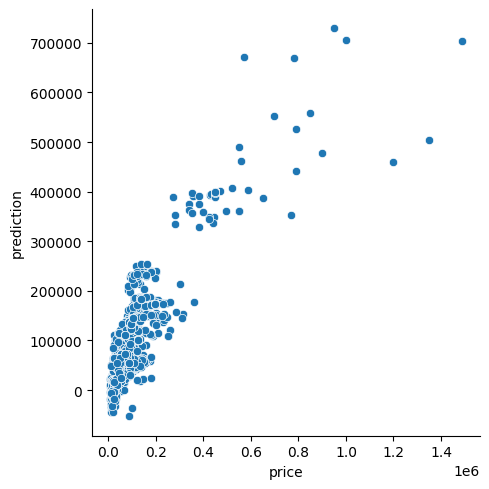

In [48]:
sns.relplot(x='price',y='prediction',data=y_test)
plt.show()